# Goals

Tag study, grant and dataType


In [22]:
# setup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path + "/scripts")

import ontologyScraper as ont
import textcleaning as tc

In [23]:
# just for dev
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# read in raw data from snowflake
df = pd.read_csv("../data/portal-data-raw-20231214.csv", low_memory=False, index_col=0)

In [25]:
# # potential features
df = df.loc[
    :,
    [
        "ID",
        "TABLE",
        "TYPE",
        "NAME",
        "STUDY",
        "ASSAY",
        "DATATYPE",
        "DATASUBTYPE",
        "RESOURCETYPE",
        "FILEFORMAT",
        "GRANTS",
        "PARENTID",
        "PROJECTID",
        "STUDYID",
        "PROJECT",
        "CONTRIBUTOR",
        "PI",
    ],
]


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524392 entries, 0 to 524391
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            519340 non-null  object
 1   TABLE         524392 non-null  object
 2   TYPE          222172 non-null  object
 3   NAME          519340 non-null  object
 4   STUDY         286613 non-null  object
 5   ASSAY         335741 non-null  object
 6   DATATYPE      334951 non-null  object
 7   DATASUBTYPE   224916 non-null  object
 8   RESOURCETYPE  268279 non-null  object
 9   FILEFORMAT    337821 non-null  object
 10  GRANTS        233913 non-null  object
 11  PARENTID      514772 non-null  object
 12  PROJECTID     448049 non-null  object
 13  STUDYID       166124 non-null  object
 14  PROJECT       5540 non-null    object
 15  CONTRIBUTOR   41095 non-null   object
 16  PI            11609 non-null   object
dtypes: object(17)
memory usage: 72.0+ MB


In [27]:
# cols that are lists represented as strings. 

list_cols = ["STUDY", "DATATYPE", "ASSAY", "GRANTS"]
for l in list_cols: 
    try: 
        df[l] = df[l].str.replace('\n|\[|\]|"', "", regex=True).str.strip()
    except Exception as e: 
        print(e)

# fill in empty cells with nan's
df = df.replace("", np.nan)
df = df.replace("undefined", np.nan)
df = df.replace("\t", " ", regex=False)

In [28]:
df.sample(20)

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI
332466,syn31992081,SAGE.PORTAL_RAW.NF,file,818_dox0_r3.DupRate_plot.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn31988865,syn21984813,syn21984813,NaN,NaN,NaN
426530,syn51478797,SAGE.PORTAL_RAW.NF,file,28cNF_1_fastqc.zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn51477138,syn11374353,syn11374353,NaN,NaN,NaN
177487,syn32207544,SAGE.PORTAL_RAW.AD,NaN,200826-B49-A_NYGC_S1_L003_R1_001.fastq.gz,ROSMAP,scrnaSeq,geneExpression,raw,experimentalData,fastq,"U01AG061356,RF1AG057473,U01AG046152,R01AG06683...",syn51123517,syn2580853,NaN,NaN,NaN,NaN
10438,syn7383836,SAGE.PORTAL_RAW.AD,NaN,5772325089_R01C02_8-Swath1_Grn.jpg,ROSMAP,methylationArray,epigenetics,raw,experimentalData,jpg,U01AG046152,syn7383720,syn2580853,NaN,NaN,NaN,NaN
430782,syn51485405,SAGE.PORTAL_RAW.NF,file,quant.sf,NaN,RNA-seq,geneExpression,processed,experimentalData,sf,NaN,syn51476872,syn11374349,syn11374349,NaN,NaN,NaN
244304,syn5586833,SAGE.PORTAL_RAW.NF,file,patient_3_tissue_0005_MODERATE_impact_somaticM...,NaN,wholegenomesequencing,genomicVariants,processed,experimentalData,maf,NaN,syn5578958,syn4984604,syn4984604,NaN,NaN,NaN
404111,syn43304084,SAGE.PORTAL_RAW.NF,file,1.3.12.2.1107.5.2.32.35288.2010053016410435784...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn43303973,syn17098100,syn17098100,NaN,NaN,NaN
346709,syn38867979,SAGE.PORTAL_RAW.NF,folder,libParams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn38867977,syn32909874,NaN,NaN,NaN,NaN
265853,syn22094248,SAGE.PORTAL_RAW.NF,file,17619-D1_Lane3_20190318000_S49_L003_R2_001.fas...,NaN,wholeexomesequencing,genomicVariants,raw,experimentalData,fastq,NaN,syn22092088,syn5610418,syn5610446,NaN,NaN,NaN
318138,syn31733431,SAGE.PORTAL_RAW.NF,file,genome_insert_size_histogram.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn31724965,syn23651229,syn23651229,NaN,NaN,NaN


# EDA


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

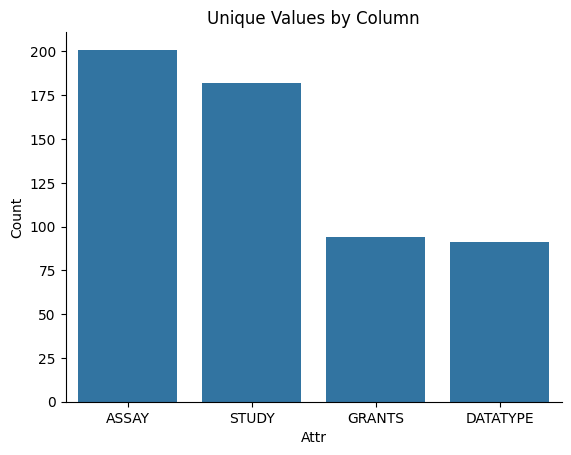

In [30]:
# unique values by column
unique_counts = df[list_cols].fillna("").apply(lambda x: len(np.unique(x)))
unique_counts = (
    pd.DataFrame(unique_counts)
    .reset_index()
    .rename(columns={"index": "Attr", 0: "Count"})
)
sns.barplot(unique_counts.sort_values(
    "Count", ascending=False), x="Attr", y="Count").set(title="Unique Values by Column")

sns.despine()

/var/folders/p0/5m4pdsm55jn_d5nzbjv6bjf40000gq/T/ipykernel_32649/3986323795.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


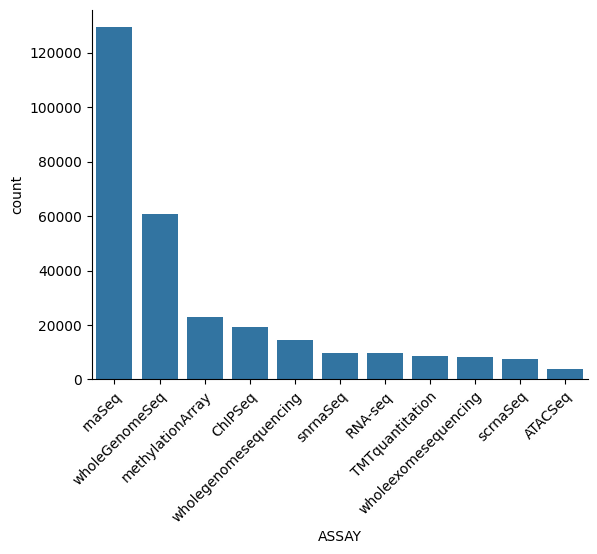

In [31]:
# similar labels
assay_counts = (
    pd.DataFrame(df["ASSAY"].value_counts())
    .reset_index()
    .rename(columns={"index": "ASSAY", "ASSAY": "count"})
)

g = sns.barplot(x="ASSAY", y="count", data=assay_counts.loc[:10, :])

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

sns.despine()

plt.show()

In [32]:
# Missing annotations

# Cleanup Attributes


In [33]:
# get spelling from public ontology source for assay
# vv_assay = ont.purl_main(
#     "http://purl.obolibrary.org/obo/OBI_0000070")
# vv_assay = pd.Series(vv_assay)
# vv_assay.to_csv('./data/valid_values_assay.csv')

vv_assay = (
    pd.read_csv("../data/valid_values_assay.csv")
    .drop(columns="Unnamed: 0")
    .rename(columns={"0": "values"})
)

In [34]:
# manually recode
assay_recoder = {
    "3D Confocal Imaging": "3D confocal imaging",
    "3D Confocal imaging": "3D confocal imaging",
    "3D confocal Imaging": "3D confocal imaging",
    "3Dconfocalimaging": "3D confocal imaging",
    "3DConfocalImaging": "3D confocal imaging",
    "3DConfocalimaging": "3D confocal imaging",
    "3DConfocalImagingactive avoidance learning behavior": "active avoidance learning behavior assay",
    "ATAC-seq": "ATAC-seq assay",
    "ATACseq": "ATAC-seq assay",
    "ATACSeq": "ATAC-seq assay",
    "activeavoidancelearningbehavior": "activeavoidancelearningbehaviorassay",
    "bisulfite sequencing": "bisulfite sequencing assay",
    "bisulfiteSeq": "bisulfite sequencing assay",
    "bisulfitesequencing": "bisulfite sequencing assay",
    "Blood Chemistry Measurement": "blood chemistry measurement",
    "bloodchemistrymeasurement": "blood chemistry measurement",
    "BloodChemistryMeasurement": "blood chemistry measurement",
    "cell proliferation": "cell proliferation assay",
    "cellproliferation": "cell proliferation assay",
    "ChIP-Seq": "ChIP-seq assay",
    "ChIP-seq": "ChIP-seq assay",
    "ChIPSeq": "ChIP-seq assay",
    "contextual conditioning behavior": "contextual conditioning behavior assay",
    "electrophysiology": "electrophysiology assay",
    "exomeSeq": "whole exome sequencing",
    "flow cytometry": "flow cytometry assay",
    "flowcytometry": "flow cytometry assay",
    "Genotyping": "genotyping assay",
    "genotyping": "genotyping assay",
    "Immunoprecipitation": "immunoprecipitation assay",
    "immunoprecipitation": "immunoprecipitation assay",
    "liquid chromatography/tandem mass spectrometry": "liquid chromatography-tandem mass spectrometry",
    "liquidchromatography/tandemmassspectrometry": "liquid chromatography-tandem mass spectrometry",
    "localfieldpotentialrecording": "local field potential recording",
    "mass spectrometry": "mass spectrometry assay",
    "massspectrometry": "mass spectrometry assay",
    "methylationArray": "methylation array",
    "methylationarray": "methylation array",
    "microscopy": "microscopy assay",
    "novelty response behavior": "novelty response behavior assay",
    "noveltyresponsebehavior": "novelty response behavior assay",
    "noveltyresponsebehaviorassay": "novelty response behavior assay",
    "photography": "photograph",
    "polymerase chain reaction": "polymerase chain reaction assay",
    "polymeraseChainReaction": "polymerase chain reaction assay",
    "polymerasechainreaction": "polymerase chain reaction assay",
    "Positron Emission Tomography": "positron emission tomography imaging assay",
    "positronemissiontomography": "positron emission tomography imaging assay",
    "PositronEmissionTomography": "positron emission tomography imaging assay",
    "proximityextensionassay": "proximity extension assay",
    "HI-C": "Hi-C assay",
    "RNA-seq": "RNA-seq	assay",
    "RNA-Seq": "RNA-seq assay",
    "RNA-seq	assay": "RNA-seq assay",
    "rnaArray": "RNA array",
    "RNAarray": "RNA array",
    "RNAseq": "RNA-seq assay",
    "rnaSeq": "RNA-seq assay",
    "RNASeq": "RNA-seq assay",
    "scATAC-seq assay": "single-cell ATAC-seq assay",
    "scATACSeq": "single-cell ATAC-seq assay",
    "scRNA-seq assay": "single-cell RNA sequencing assay",
    "scRNAseq": "single-cell RNA sequencing assay",
    "scrnaSeq": "single-cell RNA sequencing assay",
    "scwholeGenomeSeq": "single-cell whole genome sequencing assay",
    "sorbitoldehydrogenaseactivitylevelassay": "sorbitol dehydrogenase activity level assay",
    "single-cell RNA-seq": "single-cell RNA sequencing assay",
    "single-cellRNA-seq	assay": "single-cell RNA sequencing assay",
    "snATAC-seq assay": "single-nucleus ATAC-seq assay",
    "snATACSeq": "single-nucleus ATAC-seq assay",
    "snRNA-seq assay": "single-nucleus RNA sequencing assay",
    "snrnaSeq": "single-nucleus RNA sequencing assay",
    "snpArray": "SNParray",
    "T cell receptor repertoire sequencing": "T cell receptor repertoire sequencing assay",
    "Tcellreceptorrepertoiresequencing": "T cell receptor repertoire sequencing assay",
    "TMT quantification": "TMT quantitation assay",
    "TMT quantitation": "TMT quantitation assay",
    "TMTquantitation": "TMT quantitation assay",
    "TMTquantification": "TMT quantitation assay",
    "western blot": "western blot assay",
    "westernblot": "western blot assay",
    "westernBlot": "western blot assay",
    "Whole Exome Sequencing": "whole exome sequencing assay",
    "whole exome sequencing": "whole exome sequencing assay",
    "whole genome sequencing": "whole genome sequencing assay",
    "whole-cell patch clamp": "whole-cell patch clamp assay",
    "whole-cellpatchclamp": "whole-cell patch clamp assay",
    "WholeExomeSequencing": "whole exome sequencing assay",
    "wholeexomesequencing": "whole exome sequencing assay",
    "wholeGenomeSeq": "whole genome sequencing assay",
    "wholegenomesequencing": "whole genome sequencing assay",
}

In [35]:
# for reordering if necessary
k = assay_recoder.keys()
k = sorted(k, key=str.casefold)
for ki in k:
    print('"' + ki + '"' + ":" + '"' + assay_recoder[ki] + '"' + ",")

"3D Confocal Imaging":"3D confocal imaging",
"3D Confocal imaging":"3D confocal imaging",
"3D confocal Imaging":"3D confocal imaging",
"3Dconfocalimaging":"3D confocal imaging",
"3DConfocalImaging":"3D confocal imaging",
"3DConfocalimaging":"3D confocal imaging",
"3DConfocalImagingactive avoidance learning behavior":"active avoidance learning behavior assay",
"activeavoidancelearningbehavior":"activeavoidancelearningbehaviorassay",
"ATAC-seq":"ATAC-seq assay",
"ATACseq":"ATAC-seq assay",
"ATACSeq":"ATAC-seq assay",
"bisulfite sequencing":"bisulfite sequencing assay",
"bisulfiteSeq":"bisulfite sequencing assay",
"bisulfitesequencing":"bisulfite sequencing assay",
"Blood Chemistry Measurement":"blood chemistry measurement",
"bloodchemistrymeasurement":"blood chemistry measurement",
"BloodChemistryMeasurement":"blood chemistry measurement",
"cell proliferation":"cell proliferation assay",
"cellproliferation":"cell proliferation assay",
"ChIP-Seq":"ChIP-seq assay",
"ChIP-seq":"ChIP-seq ass

In [36]:
df = df.replace("\t", " ", regex=True)

In [37]:
# fuzzy matching to self
col_recode = "ASSAY"

# A good cut off is 95, otherwise similar but not exact matches arise like whole exome sequencing versus whome genome sequencing
df[col_recode] = df[col_recode].replace(assay_recoder, regex=True)

results = tc.fuzzy_matcher(
    df[col_recode], df[col_recode].fillna("").unique(), 90)

results["antCount"] = results["Annotation"].apply(
    lambda x: len(df[df[col_recode] == x])
)

with pd.option_context("display.max_rows", None):
    display(results)

# take the annotation with the best score match
idx = results.groupby("Annotation")["Score"].idxmax()

max_scores = (
    results.loc[idx]
    .sort_values(
        by=["Annotation", "Score"],
        key=lambda x: x.str.lower() if pd.api.types.is_string_dtype(x.dtype) else x,
    )
    .reset_index(drop=True)
)

# Works for most but not for example "whole exome sequencing" which matches to "whole genome sequencing assay" instead of "exome sequencing assay"

for k, v in assay_recoder.items():
    max_scores.loc[max_scores["Annotation"] == k, "ontologyWord"] = v

# max_scores

,Annotation,ontologyWord,Score,antCount
0,activeavoidancelearningbehaviorassay,activeavoidancelearningbehaviorassayassay,91,3544
1,contextualconditioningbehavior,contextualconditioningbehaviorassay,100,3
2,electrochemiluminescence,"electrochemiluminescence,SiMoA",92,18
3,novelty response behavior assay,novelty response behavior assayassay,91,275
4,whole exome sequencing,whole genome sequencing assay,91,625
5,whole exome sequencing,whole exome sequencing assay,98,625


In [39]:
# fuzzy matching to ontology
col_recode = "ASSAY"

# A good cut off is 95, otherwise similar but not exact matches arise
results = tc.fuzzy_matcher(df[col_recode], vv_assay["values"], 90)
results["antCount"] = results["Annotation"].apply(
    lambda x: len(df[df[col_recode] == x])
)

with pd.option_context("display.max_rows", None):
    display(results)

,Annotation,ontologyWord,Score,antCount
0,liquid chromatography-tandem mass spectrometry,liquid chromatography mass spectrometry assay,92,10
1,RNAfluorescenceinsituhybridization,fluorescence in-situ hybridization assay,91,1
2,T cell receptor repertoire sequencing assay,B cell receptor repertoire sequencing assay,91,20
3,whole exome sequencing,whole genome sequencing assay,91,625


In [40]:
df[col_recode] = df[col_recode].replace(assay_recoder, regex=False)
df = df.replace("assay assay", "assay", regex=True)
df = df.replace("assayassay", "assay", regex=True)

In [41]:
sorted(df['ASSAY'].dropna().unique(),key=str.casefold)

['10xmultiome',
 '16SrRNA-seq assay',
 '2DAlamarBluefluorescence',
 '2DCellTiter-Glo',
 '2DIncucyte',
 '3D confocal imaging',
 '3Delectronmicroscopy assay',
 '3Dimaging',
 '3Dmicrotissueviability',
 'activeavoidancelearningbehaviorassay',
 'anxiety-relatedbehavior',
 'array',
 'ATAC-seq assay',
 'atomicforcemicroscopy assay',
 'ATPaseactivityassay',
 'autoradiography',
 'BakerLipidomics',
 'BiocratesBileAcids',
 'BiocratesBileAcids,Biocratesp180,Metabolon',
 'Biocratesp180',
 'bisulfite sequencing assay',
 'blood chemistry measurement',
 'bluenativePAGE',
 'bodysizetraitmeasurement',
 'brightfieldmicroscopy assay',
 'calciumretentioncapacityassay',
 'cAMP-GloMaxAssay',
 'cell proliferation assay',
 'cellcompetition',
 'cellcount',
 'cellviabilityassay',
 "Children'sDermatologyLifeQualityIndexQuestionnaire",
 'ChIP-seq assay',
 'CITESeq',
 'clinicaldata',
 'cNF-Skindex',
 'Confocalimaging',
 'confocalmicroscopy assay',
 'contextualconditioningbehavior',
 'contextualconditioningbehaviora

/var/folders/p0/5m4pdsm55jn_d5nzbjv6bjf40000gq/T/ipykernel_32649/3225533118.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


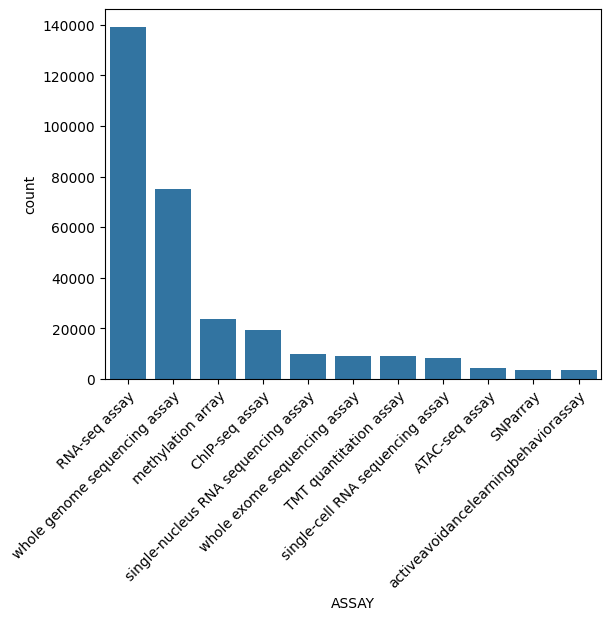

In [42]:
# similar labels
assay_counts = (
    pd.DataFrame(df["ASSAY"].value_counts())
    .reset_index()
    .rename(columns={"index": "ASSAY", "ASSAY": "count"})
)

g = sns.barplot(x="ASSAY", y="count", data=assay_counts.loc[:10, :])

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

In [43]:
assay_counts.iloc[:20, :]

,ASSAY,count
0,RNA-seq assay,139276
1,whole genome sequencing assay,75046
2,methylation array,23600
3,ChIP-seq assay,19205
4,single-nucleus RNA sequencing assay,9839
5,whole exome sequencing assay,8937
6,TMT quantitation assay,8912
7,single-cell RNA sequencing assay,8053
8,ATAC-seq assay,4290
9,SNParray,3643


Fix studies


In [44]:
DATATYPE_recoder = {"Analysis": "analysis", "Volume": "volume"}

# fix data type
sorted(df["DATATYPE"].fillna("").unique(), key=str.casefold)

df["DATATYPE"] = df["DATATYPE"].replace(DATATYPE_recoder)

In [45]:
# fix resourceType
fix_col = "RESOURCETYPE"

recoder = {"ExperimentalData": "experimentalData", " tool": "tool"}

# fix col type
sorted(df[fix_col].fillna("").unique(), key=str.casefold)

df[fix_col] = df[fix_col].replace(recoder)

In [49]:
# fix resourceType
fix_col = "DATASUBTYPE"

recoder = {"ExperimentalData": "experimentalData", " tool": "tool"}

# fix data type
sorted(df[fix_col].fillna("").unique(), key=str.casefold)

# df[fix_col] = df[fix_col].replace(recoder)

['',
 'bundle',
 'clinical',
 'CopyNumberSegments',
 'dataMatrix',
 'md5',
 'metadata',
 'normalized',
 'preprocessed',
 'processed',
 'raw',
 'raw,processed',
 'report',
 'representative',
 'residualized',
 'SNPvariants',
 'structuralvariants']

In [50]:
# fix resourceType
fix_col = "FILEFORMAT"

recoder = {
    "Bash script": "bash script",
    "R script": "R",
    "synapse Table": "Synapse Table",
    "Python script": "py",
}

# fix data type
print(sorted(df[fix_col].fillna("").unique(), key=str.casefold))

df[fix_col] = df[fix_col].replace(recoder)

['', '7z', 'AB1', 'abf', 'ai', 'avi', 'bai', 'bam', 'bashscript', 'Bashscript', 'bat', 'bed', 'bedbroadPeak', 'bedgappedPeak', 'bedgraph', 'bednarrowPeak', 'bgzip', 'bias', 'bigwig', 'bim', 'bpm', 'bsc', 'cel', 'cfg', 'chp', 'cnn', 'cnr', 'cns', 'config', 'cov', 'crai', 'cram', 'csi', 'css', 'csv', 'ctab', 'czi', 'dat', 'db', 'DICOM', 'dict', 'doc', 'docx', 'excel', 'fai', 'fam', 'fasta', 'fastq', 'Fastq', 'fcs', 'feather', 'flagstat', 'gct', 'gif', 'gmt', 'gtf', 'gz', 'gzip', 'h5ad', 'hdf', 'hdf5', 'hic', 'html', 'hyperlink', 'idat', 'idx', 'idxstats', 'jpg', 'js', 'json', 'locs', 'log', 'maf', 'matrix', 'md5', 'mov', 'mp4', 'msf', 'mtx', 'mzML', 'nii', 'out', 'pdf', 'pdresult', 'pdstudy', 'pdview', 'pepXML', 'plink', 'png', 'powerpoint', 'powerPoint', 'Pythonscript', 'pzf', 'pzfx', 'R', 'raw', 'RCC', 'RData', 'Rdata', 'rds', 'recal', 'RLF', 'Rscript', 'saf', 'sdf', 'seg', 'Sentrixdescriptorfile', 'SEQ', 'sf', 'sf3', 'sqlite', 'stats', 'svg', 'svs', 'SynapseTable', 'synapseTable', 'ta

In [56]:
df["FILEFORMAT"] = df["FILEFORMAT"].str.upper()
df["FILEFORMAT"] = df["FILEFORMAT"].str.strip(r'.')

In [53]:
# file formats
# file_formats = ont.purl_main('http://edamontology.org/format_1915')
# pd.Series(file_formats).to_csv('./data/file-formats.csv', index = False)
file_formats = pd.read_csv(
    "../data/file-formats.csv").rename(columns={"0": "values"})
file_formats.head()

,values
0,.nib
1,2bit
2,3D-1D scoring matrix format
3,A2M
4,AB1


In [57]:
results = tc.fuzzy_matcher(df["FILEFORMAT"], file_formats["values"], 100)
results = results.loc[~results["ontologyWord"].isin(["SAM", "SS"])]
results

,Annotation,ontologyWord,Score
1,BEDGRAPH,bedgraph,100
2,BGZIP,bgzip,100
3,BIGWIG,bigWig,100
4,CEL,cel,100
5,DAT,dat,100
6,DOCX,docx,100
7,MZML,mzML,100
8,NII,nii,100
9,PEPXML,pepXML,100
10,RAW,raw,100


In [58]:
recoder = dict(zip(results["Annotation"], results["ontologyWord"]))

In [60]:
results = tc.fuzzy_matcher(df["FILEFORMAT"], file_formats["values"], 85)
results = results.loc[~results["ontologyWord"].isin(["SAM", "SS"])]
results

,Annotation,ontologyWord,Score
1,BED,bed6,86
2,BEDGRAPH,bedgraph,100
3,BGZIP,bgzip,100
4,BIGWIG,bigWig,100
5,CEL,cel,100
6,DAT,IDAT,86
7,DAT,dat,100
8,DOC,docx,86
9,DOCX,docx,100
10,FASTQ,FASTA,89


In [61]:
new_terms = [
    "TXT",
    "mzXML",
    "mds",
    "sf3",
    "tbz",
    "drv",
    "crai",
    "dbm",
    "svs",
    "svg",
    "tmp",
    "unr",
    "gmt",
    "R",
    "Rmd",
    "Rdata",
    "fam",
    "gz",
    "h5",
    "hdr",
    "img",
    "tgz",
    "XSL",
    "XLS",
    "zip",
    "seq",
    "rtf",
    "sh",
    "doc",
    "bgz",
    "bib",
]

for n in new_terms:
    file_formats.loc[len(file_formats) + 1, "values"] = n

file_formats = file_formats.drop_duplicates(subset="values")

In [62]:
recoder = recoder | {
    "Rscript": "R script",
    "fasta": "FASTA",
    "Tif": "TIF",
    "tif": "TIF",
    "xls": "XLS",
    "XLSX": "xlsx",
    "RAW": "raw",
    "yml": "YAML",
    "yaml": "YAML",
}

In [64]:
df["FILEFORMAT"] = df["FILEFORMAT"].str.strip().replace(recoder)

In [69]:
fileFormats_og = set(df["FILEFORMAT"].unique())
print(
    f"Percent of missing file formats: {round(sum(df['FILEFORMAT'].isnull())/len(df) * 100, 2)}"
)
# easy pass
df.loc[:, "FILEEXTENSIONS"] = df.loc[:, "NAME"].str.rsplit(
    r".", n=1, expand=True)[1]

Percent of missing file formats: 35.58


In [74]:
results = tc.fuzzy_matcher(
    df["FILEEXTENSIONS"].str.strip(), file_formats["values"], 100
)

results = results.loc[~results["ontologyWord"].isin(["SAM", "SS"])]

recoder = recoder | dict(zip(results["Annotation"], results["ontologyWord"]))

checker = list(file_formats["values"])

df["FILEEXTENSIONS"] = (
    df["FILEEXTENSIONS"]
    .fillna("")
    .apply(
        lambda x: x
        if x in checker or bool(re.match("[a-zA-Z]", x)) and len(x) < 7
        else np.nan
    )
)

df["FILEEXTENSIONS"] = df["FILEEXTENSIONS"].str.strip().replace(recoder).str.upper()

print(len(set(df["FILEEXTENSIONS"].fillna("").unique()) - set(file_formats["values"])))
set(df["FILEEXTENSIONS"].fillna("").unique()) - set(file_formats["values"])

163


{'',
 'ABF',
 'AI',
 'AJCR',
 'ANNO',
 'AX_T1',
 'BAK',
 'BAT',
 'BEDGRAPH',
 'BG',
 'BGZ',
 'BIAS',
 'BIB',
 'BIGWIG',
 'BIM',
 'BLOCK',
 'BPM',
 'BSC',
 'BW',
 'BZ2',
 'C4GH',
 'CDR',
 'CDS',
 'CEL',
 'CFG',
 'CLOUPE',
 'CNN',
 'CNR',
 'CNS',
 'CONFIG',
 'COUNT',
 'COVTSF',
 'CPN',
 'CRAI',
 'CSI',
 'CSS',
 'CTAB',
 'CZI',
 'CZII',
 'DAT',
 'DB',
 'DBM',
 'DBSNP',
 'DCM',
 'DICT',
 'DNA',
 'DOC',
 'DOCX',
 'EDAT3',
 'EDS',
 'EMF',
 'ENL',
 'EVS',
 'FA',
 'FAI',
 'FAM',
 'FCS',
 'FQ',
 'GCT',
 'GISTIC',
 'GMT',
 'GZ',
 'H5',
 'H5AD',
 'HDR',
 'HH',
 'HIC',
 'IDX',
 'IMG',
 'IN',
 'IPYNB',
 'JS',
 'KEY',
 'LMIX',
 'LOCS',
 'LOG',
 'LSF',
 'M',
 'M2',
 'MATE1',
 'MATE2',
 'MATRIX',
 'MD5',
 'MDD',
 'MDS',
 'MOV',
 'MP4',
 'MQD',
 'MZML',
 'MZXML',
 'NHR',
 'NII',
 'NIN',
 'NSQ',
 'OUT',
 'OUTPUT',
 'PAR',
 'PB',
 'PBI',
 'PCRD',
 'PEP',
 'PEPXML',
 'PICKLE',
 'PILEUP',
 'PM',
 'PPT',
 'PPTX',
 'PROPS',
 'PSYDAT',
 'PY',
 'PZF',
 'PZFX',
 'QC',
 'QUAL',
 'RAW',
 'RAWCNV',
 'RCC',
 'RCNT'

In [75]:
print(
    f"Percentage of overlaping file extensions: {round(sum(df['FILEFORMAT'] == df['FILEEXTENSIONS']) / len(df) * 100,2)}"
)

df["FILEFORMAT"] = df["FILEFORMAT"].fillna(df["FILEEXTENSIONS"])

print(
    f"Percent of missing file formats after quick cleaning: {round(sum(df['FILEFORMAT'].isnull())/len(df) * 100, 2)}"
)

fileFormats_new = set(df["FILEFORMAT"].unique())

print(len(fileFormats_og), len(fileFormats_new))
print(fileFormats_new - fileFormats_og)

Percentage of overlaping file extensions: 40.44
Percent of missing file formats after quick cleaning: 6.88
127 252
{'edat3', 'md5', 'gz', 'py', 'mdd', 'S', 'sizes', 'hh', 'PED', 'out', 'mate1', 'fai', 'enl', 'czi', 'pb', 'seq', 'rtf', 'pbi', 'SDAT', 'psydat', 'zip', 'sf', 'tmp', 'seg', 'rds', 'vloupe', 'dict', 'PAR', 'nsq', 'recal', 'Rdata', 'LSM', 'S_POST', 'sh', 'm', 'ab1', 'c4gh', 'js', 'MAP', 'Rmd', 'lmix', 'WIG', 'pm', 'qual', 'XSL', 'TIFF', 'mov', 'cdr', 'cpn', 'ipynb', 'pickle', 'fam', 'crai', 'qc', 'Ax_T1', 'Rout', 'key', 'eds', 'bz2', 'tgz', 'mp4', 'stats', 'h5', 'output', 'RData', 'count', 'covtsf', 'css', 'cnr', 'img', 'rData', 'ai', 'db', 'svs', 'fcs', 'REC', 'emf', 'pptx', 'nin', 'xlsb', 'idx', 'nhr', 'in', 'cds', 'cns', 'dbm', 'SNV', 'dcm', 'Pileup', 'fa', 'pep', 'ctab', 'doc', 'table', 'AJCR', 'XLS', 'RDa', 'SPAR', 'bib', 'pzfx', 'bim', 'saf', 'sam', 'mate2', 'tbi', 'cloupe', 'block', 'svg', 'MAT', 'csi', 'log', 'wndpos', 'pzf', 'bw', 'dna', 'hdr', 'sortu', 'gistic', 'ta

In [76]:
df["FILEFORMAT"] = df["FILEEXTENSIONS"].fillna(df["FILEFORMAT"])

In [77]:
df = df.drop(columns=["FILEEXTENSIONS"])

In [78]:
df[df["FILEFORMAT"].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36062 entries, 105905 to 517834
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              31010 non-null  object
 1   TABLE           36062 non-null  object
 2   TYPE            30673 non-null  object
 3   NAME            31010 non-null  object
 4   STUDY           28 non-null     object
 5   ASSAY           1224 non-null   object
 6   DATATYPE        905 non-null    object
 7   DATASUBTYPE     549 non-null    object
 8   RESOURCETYPE    914 non-null    object
 9   FILEFORMAT      0 non-null      object
 10  GRANTS          21 non-null     object
 11  PARENTID        31010 non-null  object
 12  PROJECTID       30980 non-null  object
 13  STUDYID         8717 non-null   object
 14  PROJECT         0 non-null      object
 15  CONTRIBUTOR     0 non-null      object
 16  PI              21 non-null     object
 17  fileExtensions  5516 non-null   object
dtype

# cleanup "types"


In [83]:
df.loc[
    df["NAME"].str.contains("Dictionary", flags=re.IGNORECASE, na = False), "METADATATYPE"
] = "dataDictionary"

In [84]:
df.loc[
    (df["NAME"].str.contains("metadata", flags=re.IGNORECASE, na = False))
    & (df["RESOURCETYPE"].isnull())
    & (~df["FILEFORMAT"].isin(["py", "ipynb"])),
    "RESOURCETYPE",
] = "metadata"

In [85]:
df.loc[
    (df["NAME"].str.contains("metadata", flags=re.IGNORECASE, na = False))
    & (df["RESOURCETYPE"].isnull()),
]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,fileExtensions,METADATATYPE


In [86]:
df.loc[df["DATASUBTYPE"].isnull(),]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,fileExtensions,METADATATYPE
24,syn3169023,SAGE.PORTAL_RAW.AD,NaN,AMP-AD_HBTRC_MSSM_Agilent44Karray_PFC_AgeCorre...,HBTRC,RNA array,geneExpression,NaN,experimentalData,TSV,U01AG046170,syn20808200,syn2580853,NaN,NaN,NaN,NaN,None,NaN
25,syn3169026,SAGE.PORTAL_RAW.AD,NaN,AMP-AD_HBTRC_MSSM_Agilent44Karray_Covariates,HBTRC,SNParray,genomicVariants,NaN,metadata,TSV,U01AG046170,syn16944513,syn2580853,NaN,NaN,NaN,NaN,None,NaN
29,syn3173724,SAGE.PORTAL_RAW.AD,NaN,Emory_Emory_LTQOrbitrapXL_ADPD,Emory_ADRC,LC-MSMS,proteomics,NaN,experimentalData,raw,U01AG046161,syn9884385,syn2580853,NaN,NaN,NaN,NaN,None,NaN
30,syn3175294,SAGE.PORTAL_RAW.AD,NaN,Emory_Emory_LTQOrbitrapXL_AD,Emory_ADRC,LC-MSMS,proteomics,NaN,experimentalData,raw,U01AG046161,syn9884385,syn2580853,NaN,NaN,NaN,NaN,None,NaN
31,syn3176449,SAGE.PORTAL_RAW.AD,NaN,Emory_Emory_LTQOrbitrapXL_ALS,Emory_ADRC,LC-MSMS,proteomics,NaN,experimentalData,raw,U01AG046161,syn9884385,syn2580853,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524386,syn26546326,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_biospecimen.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN
524387,syn26546331,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_manifest.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN
524388,syn26546334,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_individual_human_1.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN
524389,syn26546335,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_individual_human_2.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN


In [89]:
# ASSUMING ALL ROWS ARE FILES
df.loc[(~df["FILEFORMAT"].isnull()) & (df["TYPE"].isnull()), "TYPE"] = 'file'

In [88]:
df.loc[df['TYPE'].isnull()]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,fileExtensions,METADATATYPE
0,syn2426151,SAGE.PORTAL_RAW.AD,NaN,chr1.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,GZ,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,gz,NaN
1,syn2426152,SAGE.PORTAL_RAW.AD,NaN,chr2.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,GZ,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,gz,NaN
2,syn2426153,SAGE.PORTAL_RAW.AD,NaN,chr4.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,GZ,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,gz,NaN
3,syn2426154,SAGE.PORTAL_RAW.AD,NaN,chr8.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,GZ,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,gz,NaN
4,syn2426155,SAGE.PORTAL_RAW.AD,NaN,chr9.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,GZ,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,gz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524387,syn26546331,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_manifest.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN
524388,syn26546334,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_individual_human_1.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN
524389,syn26546335,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_individual_human_2.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,PNG,NaN
524390,syn27727848,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,quant_peaks_1FDR_minOverlap2_300bpExt_150_TMM_...,HumanFC,ATAC-seq assay,epigenetics,processed,analysis,GZ,U01MH103339,syn29253810,NaN,NaN,NaN,NaN,NaN,gz,NaN


In [91]:
df.to_csv(f"../data/cleaned-data-{datetime.now().strftime('%Y%m%d')}.csv", index=False)